rp# PyTorch Useful Methods

In [1]:
import torch
from IPython.display import Image

### expand: copy the given tensor and concat those at desired dimension.

torch.Size([2, 1, 2])


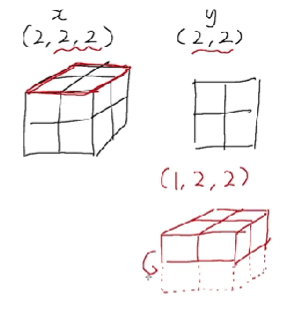

In [2]:
x = torch.FloatTensor([[[1, 2]],
                       [[3, 4]]])
print(x.size())
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\1.png")
#broadcast함수를 안쓰고 y의 똑같은 행렬을 복사붙여서 x와 같이 만든다.

tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[3., 4.],
         [3., 4.],
         [3., 4.]]])
torch.Size([2, 3, 2])


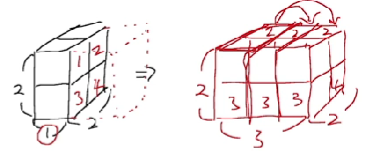

In [4]:
y = x.expand(*[2, 3, 2]) #y는 x를 [2,3,2] expand 된 형태로 만든다.

print(y)
print(y.size())
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\111.png")

#### Implement expand with cat.
cat 함수를 써서 위와 같은 동작을 수행할수있다.

In [4]:
y = torch.cat([x, x, x], dim=1) #1번째 dimension에 x를 붙여라

print(y)
print(y.size())

tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[3., 4.],
         [3., 4.],
         [3., 4.]]])
torch.Size([2, 3, 2])


### randperm: Random Permutation

인덱스(데이터 순서)을 셔플한다.

index_select 함수를 사용하여 셔플된 인덱스 값(데이터 순서값)을 데이터에 적용시킵니다

In [5]:
x = torch.randperm(10) #0부터 9까지를 셔플링한다.

print(x)
print(x.size())

tensor([1, 9, 6, 4, 0, 7, 3, 5, 2, 8])
torch.Size([10])


### argmax: Return index of maximum values

In [6]:
x = torch.randperm(3**3).reshape(3, 3, -1)

print(x)
print(x.size())

tensor([[[18,  9, 25],
         [ 0, 16,  8],
         [24, 20, 14]],

        [[ 1,  4, 17],
         [ 2, 22,  7],
         [ 5, 10, 12]],

        [[15, 13, 23],
         [ 3, 21, 19],
         [26,  6, 11]]])
torch.Size([3, 3, 3])


tensor([[1],
        [1]])
torch.Size([2, 1])


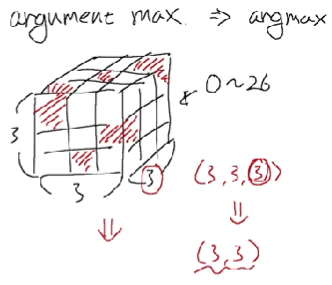

In [5]:
y = x.argmax(dim=-1) #dim = -1 관점에서 최대 인덱스 반환하라는 뜻

print(y)
print(y.size()) #([2,2]) 행렬임
Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\1111.png")

### topk: Return tuple of top-k values and indices.
value랑 index를 return 함

In [8]:
values, indices = torch.topk(x, k=1, dim=-1) # x = ([3,3,3])이고 거기서 하나만 뽑아냄(k=1). 그리고 마지막차원이야.
#value와 index를 return함

print(values.size())
print(indices.size())
#결과값으로 ([3,3])이 나오는게 아니라 ([3,3,1])이 나오는데 k가 1이라서 그렇다. k를 순서대로 returng한다.
#만약 k가 2이면 결과값이 ([3,3,2])가 나올것이다

torch.Size([3, 3, 1])
torch.Size([3, 3, 1])


Note that topk didn't reduce the dimension, even in $k=1$ case.

In [9]:
print(values.squeeze(-1)) #squeeze도 topk와 똑같은 결과값을 반환시킨다.
print(indices.squeeze(-1))
#topk랑 squeeze의 차이점은 topk는 차원이 살아있다. 

tensor([[25, 16, 24],
        [17, 22, 12],
        [23, 21, 26]])
tensor([[2, 1, 0],
        [2, 1, 2],
        [2, 1, 0]])


In [10]:
print(x.argmax(dim=-1) == indices.squeeze(-1))

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [11]:
_, indices = torch.topk(x, k=2, dim=-1)
print(indices.size())

print(x.argmax(dim=-1) == indices[:, :, 0])

torch.Size([3, 3, 2])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


### Sort by using topk

In [12]:
target_dim = -1 #맨마지막을 -1로 주고
values, indices = torch.topk(x,
                             k=x.size(target_dim),#k가 해당 dimension의 사이즈
                             largest=True)
#x에서 topk를 뽑을건데 k는 해당 dimension의 사이즈를 큰거 순서대로 뽑아라(sort)
#애는 결과값이 ([3,3,3])인데 왜냐믄 결과가 ([3,3,k])여야하니깐
print(values) #value는 큰거대로. 내림차순으로

tensor([[[25, 18,  9],
         [16,  8,  0],
         [24, 20, 14]],

        [[17,  4,  1],
         [22,  7,  2],
         [12, 10,  5]],

        [[23, 15, 13],
         [21, 19,  3],
         [26, 11,  6]]])


### Topk by using sort
Sort로 top k 구현하기

In [7]:
k=1
values, indices = torch.sort(x, dim=-1, descending=True)
values, indices = values[:, :, :k], indices[:, :, :k] #이것도 ([3,3,k]) 반환

print(values.squeeze(-1))
print(indices.squeeze(-1))

tensor([[2.],
        [4.]])
tensor([[1],
        [1]])


### masked_fill: fill the value if element of mask is True.

In [8]:
x = torch.FloatTensor([i for i in range(3**2)]).reshape(3, -1) #0부터 8까지를 리스트를 해서 floattensor 벡터를 만들고 
#그거를 reshape해서 (3,3) 한 상태

print(x)
print(x.size())

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
torch.Size([3, 3])


In [9]:
mask = x > 4

print(mask)

tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])


tensor([[ 0.,  1.,  2.],
        [ 3.,  4., -1.],
        [-1., -1., -1.]])


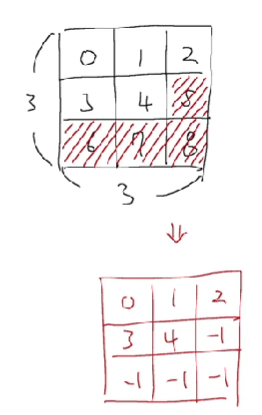

In [10]:
y = x.masked_fill(mask, value=-1) #mask가 True인곳은 -1로 채워 라는 뜻'

print(y)

Image("C:\\Users\\ryusu\\OneDrive\\바탕 화면\\새 폴더\\1313.png")

### Ones and Zeros

In [17]:
print(torch.ones(2, 3))
print(torch.zeros(2, 3))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [18]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
print(x.size())

torch.Size([2, 3])


In [19]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
